### 3.4 분류
#### 3.4.1 kNN

y = {0, 1}

책에 있는 notation:
- X, Y : 각각 하나의 점(데이터)
- n: 데이터의 차원

일반적인 notation:
- X.shape = (n, p)
- X_i, X_j : 각각 하나의 점(데이터)
- p: 데이터의 차원. 변수의 수가 p

유클리디안 거리:
$$\begin{align}
d_{euclid} &= \sqrt{(x_{i1} - x_{j1})^2 + (x_{i2} - x_{j2})^2 + \cdots + (x_{ip} - x_{jp})^2}\\
&= \sqrt{(X_i - X_j)^T \cdot (X_i - X_j)}\\
&= \sqrt{\sum_{k=1}^p {(x_{ik} - x_{jk})^2}}
\end{align}$$
- $X_i = (x_{i1}, x_{i2}, \cdots, x_{ip})$

맨하튼 거리:
$$d_{manhatton} = \sum_{k=1}^p {|x_{ik} - x_{jk}|}$$

민코프스키 거리:
$$d_{M,k} = \sqrt[k]{\sum_{k=1}^p {(x_{ik} - x_{jk})^k}}$$
- k=1: 맨하튼 거리
- k=2: 유클리디안 거리

마할라노비스 거리:
$$d_{M} = \sqrt{(X_i - X_j)^T \Sigma^{-1} (X_i - X_j)}$$
- $\Sigma$ : $X_i$에 대한 공분산 행렬
- 공분산 행렬이 단위행렬인 마할라노비스 거리는 유클리디안 거리와 동일

공분산 행렬:
- 변수 k 분산: $Var(X_{.k}) = \sigma_k^2 = \frac 1 n \sum_{i=1}^n {(X_{ik} - \bar X_{.k})^2}$
- 2개 변수간의 흩어짐의 정도를 공분산: $Cov(X_{.k} - X_{.m})$
 - $Cov(X_{.k} - X_{.m}) = \frac 1 n \sum_{i=1}^n {(X_{ik} - \bar X_{.k})(X_{im} - \bar X_{.m})}$
 - $Cor(X_{.k} - X_{.m}) = \frac 1 n \cfrac {\sum_{i=1}^n {(X_{ik} - \bar X_{.k})(X_{im} - \bar X_{.m})}}{\sigma_k \sigma_m}$
- 공분산 행렬: $\Sigma_{km} = Cov(X_{.k} - X_{.m})$

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split

dataset = load_iris()
data = pd.DataFrame(dataset.data, columns = dataset.feature_names)

X_train, X_test, y_train, y_test = train_test_split(data, dataset.target, random_state=42)

<function matplotlib.pyplot.show(*args, **kw)>

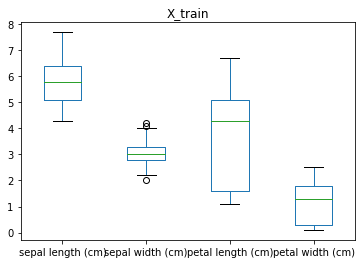

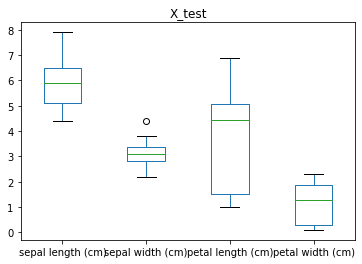

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

X_train.plot(kind='box')
plt.title("X_train")
plt.show
X_test.plot(kind='box')
plt.title("X_test")
plt.show

In [3]:
from sklearn.preprocessing import MinMaxScaler

# fit: 학습한다라는 의미인데, 반듯이 학습데이터에만 fit을 해준다.
mns = MinMaxScaler().fit(X_train)
X_train_scaled = mns.transform(X_train)
X_test_scaled = mns.transform(X_test)

In [4]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5).fit(X_train_scaled, y_train)

In [5]:
from sklearn.metrics import accuracy_score

preds = model.predict(X_test_scaled)
accuracy_score(y_test, preds)

1.0

In [6]:
model.score(X_test_scaled, y_test)

1.0

### 2.4.2 Logistic Regression

In [7]:
import numpy as np
np.random.seed(42)

In [8]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

dataset = load_breast_cancer()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
data['cancer'] = dataset.target

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

- 입력피처 X 의 shape은 (n, p)
- 타겟 y의 shape은 (n, )

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['mean radius']], data['cancer'], random_state=42)

In [10]:
X_train.shape

(426, 1)

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
from sklearn.metrics import accuracy_score

pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print(f"mean radius 만으로 예측한 결과 : {score}")

mean radius 만으로 예측한 결과 : 0.916083916083916


In [13]:
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

C:\Users\great\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


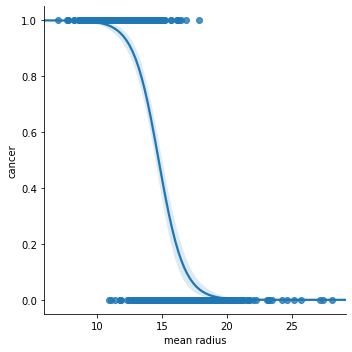

In [14]:
from seaborn import lmplot
import matplotlib.pyplot as plt
%matplotlib inline

lmplot(x='mean radius', y='cancer', data=data, logistic=True)
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], 
                                                    data['cancer'], 
                                                    random_state=42)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

print(f"전체 학습 변수를 모두 이용하여 예측한 결과 : {score}")

전체 학습 변수를 모두 이용하여 예측한 결과 : 0.958041958041958


### 2.4.3 Decision Tree

In [16]:
coinProb = np.array([.5, .5])
coinProb

array([0.5, 0.5])

앞뒷면이 나올확률이 동등한 동전에서 entropy를 계산하면:
- 동전의 앞면이 나올확률 : coinProb[0]
- 동전의 뒷면이 나올확률 : coinProb[1]

$$Entropy(p) = - \sum_i^c p_i \log p_i$$

In [17]:
Ecoin = - np.sum(coinProb * np.log2(coinProb))
Ecoin

1.0

In [18]:
coinProb = np.array([.6, .4])
Ecoin = - np.sum(coinProb * np.log2(coinProb))
Ecoin

0.9709505944546686

[Quiz] 동전의 앞면이 나올확률이 0.01 ~ 0.99 변동할 때 이때의 entropy를 계산하고 그래프로 그려보자.

In [19]:
proby1 = np.arange(0.01, 1, 0.01)
proby1.shape

(99,)

In [20]:
proby1[-10:]

array([0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [21]:
from math import log
def entropy(p):
    sum = 0
    sum += p * log(p)
    sum += (1-p) * log(1-p)
    return -sum

In [22]:
sp = pd.Series(proby1)
Ecoin = sp.map(entropy)

In [23]:
Ecoin.head()

0    0.056002
1    0.098039
2    0.134742
3    0.167944
4    0.198515
dtype: float64

In [24]:
Ecoin.index = proby1
Ecoin.head()

0.01    0.056002
0.02    0.098039
0.03    0.134742
0.04    0.167944
0.05    0.198515
dtype: float64

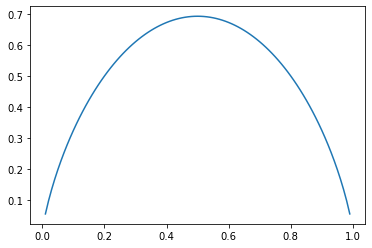

In [25]:
Ecoin.plot()

gini 계수를 계산하면:

In [26]:
def gini(p):
    sum = 1
    sum -= p**2
    sum -= (1-p)**2
    return sum

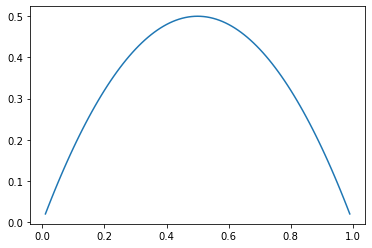

In [27]:
Gcoin = sp.map(gini)
Gcoin.index = proby1
Gcoin.plot()

3가지 색의 구슬이 들어있는 전체집단 S에서의 엔트로피를 계산해보자.

In [28]:
gooseuls = [0]*8 + [1]*7 + [2]*5
gooseuls

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]

In [29]:
S = pd.Series(gooseuls)
S.value_counts()

0    8
1    7
2    5
dtype: int64

In [30]:
nS = len(S)
nS

20

In [31]:
S.value_counts() / nS

0    0.40
1    0.35
2    0.25
dtype: float64

In [32]:
probS = S.value_counts(normalize=True)
probS

0    0.40
1    0.35
2    0.25
dtype: float64

[Quiz] probS를 이용하여 Entropy를 계산해보자.

In [33]:
def Entropy(probs):
    return - np.sum(probs*np.log2(probs))

In [34]:
SEntropy = Entropy(probS)
SEntropy

1.55887184844536

turns로 나뉜 집단에 대한 E(S')을 계산하고, 이에 따른 정보이득 Gain(S)를 도출하자.
$$ \begin{align}
E(S') &= \sum_g {\cfrac {n(S_g)}{n(S)}E(S_g)} \\
&= \cfrac{n(S_{left})}{n(S)}E(S_{left}) + \cfrac{n(S_{right})}{n(S)}E(S_{right})
\end{align}$$

In [35]:
turns = ['left']*5 + ['right']*3 + ['left']*2 + ['right']*5 + ['left']*3 + ['right']*2
turns = pd.Series(turns)
turns.tail()

15     left
16     left
17     left
18    right
19    right
dtype: object

In [36]:
turns.shape

(20,)

In [37]:
N = len(S)
groups = S.groupby(turns)

In [38]:
for key, g in groups:
    print(key)
    print(g)
    print("=============")

left
0     0
1     0
2     0
3     0
4     0
8     1
9     1
15    2
16    2
17    2
dtype: int64
right
5     0
6     0
7     0
10    1
11    1
12    1
13    1
14    1
18    2
19    2
dtype: int64


In [39]:
SprimeEntropy = 0
for _, g in groups:
    gprobs = g.value_counts(normalize=True)
    splitN = len(g)
    SprimeEntropy += splitN / N * Entropy(gprobs)
    print(SprimeEntropy)

SEntropy - SprimeEntropy

0.7427376486136672
1.4854752972273344


0.07339655121802569

[Quiz] 다음과 같은 변수 sex가 있을 때, sex로 나누는 경우에 대한 entropy와 gain을 구하라.

In [40]:
sex = ['F']*9 + ['M']*10 + ['F']

In [41]:
sex = pd.Series(sex)
groups = S.groupby(sex)

SprimeEntropy = 0
for _, g in groups:
    gprobs = g.value_counts(normalize=True)
    splitN = len(g)
    SprimeEntropy += splitN / N * Entropy(gprobs)
    print(SprimeEntropy)

SEntropy - SprimeEntropy

0.46096404744368114
0.9464393446710154


0.6124325037743447

In [42]:
for key, g in groups:
    print(key)
    print(g)
    print("=============")

F
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     1
19    2
dtype: int64
M
9     1
10    1
11    1
12    1
13    1
14    1
15    2
16    2
17    2
18    2
dtype: int64


In [43]:
pd.concat([S, turns, sex], axis=1)

,0,1,2
0,0,left,F
1,0,left,F
2,0,left,F
3,0,left,F
4,0,left,F
5,0,right,F
6,0,right,F
7,0,right,F
8,1,left,F
9,1,left,M


#### sklearn 실습

In [44]:
import seaborn as sns

data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [46]:
prep_data = data.drop(columns=['alive', 'who', 'adult_male', 'class', 'embark_town'])
prep_data.drop("deck", axis=1, inplace=True)

prep_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,True
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


In [47]:
prep_data = prep_data.dropna().reset_index(drop=True)
prep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   sex       712 non-null    object 
 3   age       712 non-null    float64
 4   sibsp     712 non-null    int64  
 5   parch     712 non-null    int64  
 6   fare      712 non-null    float64
 7   embarked  712 non-null    object 
 8   alone     712 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 45.3+ KB


In [48]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
prep_data['sex'] = le.fit_transform(prep_data['sex'])

In [49]:
prep_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,1,22.0,1,0,7.2500,S,False
1,1,1,0,38.0,1,0,71.2833,C,False
2,1,3,0,26.0,0,0,7.9250,S,True
3,1,1,0,35.0,1,0,53.1000,S,False
4,0,3,1,35.0,0,0,8.0500,S,True


아래 코드는 pandas의 get_dummies 함수를 이용하면 한번에 처리해준다.
```python
prep_data = pd.get_dummies(prep_data)
```

In [51]:
pd.get_dummies(prep_data).head()

,survived,pclass,sex,age,sibsp,parch,fare,alone,embarked_C,embarked_Q,embarked_S
0,0,3,1,22.0,1,0,7.2500,False,0,0,1
1,1,1,0,38.0,1,0,71.2833,False,1,0,0
2,1,3,0,26.0,0,0,7.9250,True,0,0,1
3,1,1,0,35.0,1,0,53.1000,False,0,0,1
4,0,3,1,35.0,0,0,8.0500,True,0,0,1


In [53]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
# fit의 대상은 2-d array이다. 따라서 Series가 아닌 DataFrame을 전달해야 함.
ohe.fit_transform(prep_data[['embarked']])

<712x3 sparse matrix of type '<class 'numpy.float64'>'
	with 712 stored elements in Compressed Sparse Row format>

In [54]:
embarked_unique = prep_data.embarked.unique()
embarked_unique

array(['S', 'C', 'Q'], dtype=object)

In [55]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
embarked_df = prep_data[['embarked']]
embarked_ohe = ohe.fit_transform(embarked_df)
embarked_df = pd.DataFrame(embarked_ohe.toarray(), columns=embarked_unique)
embarked_df.sample(5)

,S,C,Q
120,0.0,0.0,1.0
329,0.0,0.0,1.0
39,0.0,0.0,1.0
294,1.0,0.0,0.0
654,0.0,0.0,1.0


In [56]:
prep_data = pd.concat([prep_data, embarked_df], axis=1)
prep_data.drop('embarked', axis=1, inplace=True)
prep_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,alone,S,C,Q
0,0,3,1,22.0,1,0,7.2500,False,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,False,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,True,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,False,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,True,0.0,0.0,1.0


In [57]:
X_train, X_test, y_train, y_test = train_test_split(prep_data.iloc[:, 1:], 
                                                   prep_data.iloc[:, 0],
                                                   random_state=42)

In [58]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)

In [59]:
score = model.score(X_test, y_test)
score

0.7584269662921348

In [64]:
from matplotlib import font_manager
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family='Malgun Gothic')
plt.rcParams["font.family"] = font_name
plt.rcParams['axes.unicode_minus'] = False

피처 중요도:
[0.29899614 0.70100386 0.         0.         0.         0.
 0.         0.         0.         0.        ]


(-1.0, 10.0)

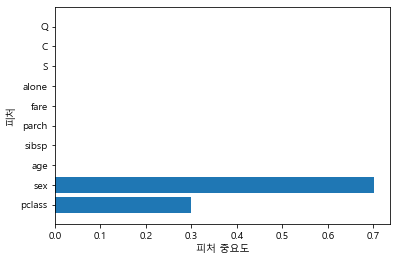

In [65]:
import numpy as np
import matplotlib.pyplot as plt

print(f"피처 중요도:\n{model.feature_importances_}")

n_features = X_train.shape[1]
plt.barh(np.arange(n_features),
        model.feature_importances_,
        align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("피처 중요도")
plt.ylabel('피처')
plt.ylim(-1, n_features)

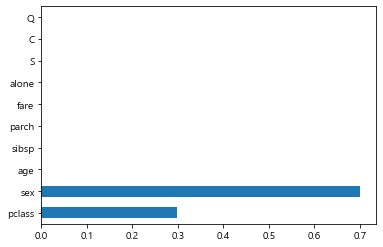

In [67]:
ft_import = pd.Series(model.feature_importances_, index=X_train.columns)
ft_import.plot.barh()

In [76]:
from sklearn import tree

In [79]:
X_train.shape

(534, 10)

생존자의 비율이 40%이고, 사망자의 비율이 60%인거죠.
- root에서의 majority는 사망

In [80]:
y_train.mean()

0.3913857677902622

In [81]:
X_train.sex.value_counts()

1    343
0    191
Name: sex, dtype: int64

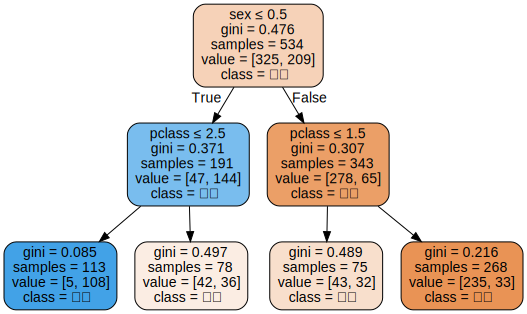

In [78]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(model, out_file=None,
                feature_names=X_train.columns,  
                class_names=['사망', '생존'],  
                filled=True, rounded=True,  
                special_characters=True)

graph = graphviz.Source(dot_data)
graph

### 2.4.4 Naive Bayse

$$\begin{align}
posterior &= \cfrac {likelihood * prior} {marginal probability} \\
P(y|X) &= P(X|y) P(y) / P(X) \\
&= P(x_1, \cdots, x_p | y) P(y) / P(x_1, \cdots, x_p) \\
&= \cfrac {P(x_1|y)\cdots P(x_p|y) P(y)} {P(x_1)\cdots P(x_p)} \\
&= \cfrac {\prod_{i=1}^p P(x_i|y) P(y)}{\prod_{i=1}^p P(x_i)}
\end{align}$$

$$\begin{align}
P(y=1|X) &= P(X|y=1) P(y=1) / P(X) \\
&= \cfrac {\prod_{i=1}^p P(x_i|y=1) P(y=1)}{\prod_{i=1}^p P(x_i)} \\
&\sim \prod_{i=1}^p P(x_i|y=1) P(y=1) \\
\log{P(y=1|X)} &\sim \sum_{i=1}^p \log{P(x_i|y=1)} + \log{P(y=1)} \\
P(y=0|X) &= P(X|y=0) P(y=0) / P(X) \\
&= \cfrac {\prod_{i=1}^p P(x_i|y=0) P(y=1)}{\prod_{i=1}^p P(x_i)} \\
&\sim \prod_{i=1}^p P(x_i|y=0) P(y=0)\\
\log{P(y=0|X)} &\sim \sum_{i=1}^p \log{P(x_i|y=0)} + \log{P(y=0)}
\end{align}$$

$P(x_1, \dots, x_p)$는 관측된 상수이므로 다음과 같은 분류 규칙을 사용할 수 있다:
$$\begin{aligned}
P(y \mid x_1, \dots, x_p) \propto P(y) \prod_{i=1}^{p} P(x_i \mid y) & \\
\Downarrow & \\
\hat{y} = \arg\max_y P(y) \prod_{i=1}^{p} P(x_i \mid y) &
\end{aligned}$$

In [1]:
import pandas as pd
data = pd.read_csv('weather.nominal.csv')
data

,outlook,temperature,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes
5,rainy,cool,normal,False,yes
6,rainy,cool,normal,True,no
7,rainy,mild,normal,False,yes
8,rainy,mild,high,True,no
9,sunny,hot,high,False,no


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   outlook       14 non-null     object
 1    temperature  14 non-null     object
 2    humidity     14 non-null     object
 3    windy        14 non-null     bool  
 4    play         14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [3]:
names = pd.Series(data.columns.values)
names = names.str.strip()
for name in names:
    print(name)

outlook
temperature
humidity
windy
play


In [4]:
data.columns = names
data.head()

,outlook,temperature,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes


In [5]:
data['windy'] = data['windy'].astype(str)

In [6]:
data.dtypes

outlook        object
temperature    object
humidity       object
windy          object
play           object
dtype: object

In [7]:
tabs = []
for col in data.columns[:-1]:
    temp = pd.crosstab(data['play'], data[col])
    tabs.append(temp)
    
joined_tab = pd.concat(tabs, axis=1)
joined_tab

,overcast,rainy,sunny,cool,hot,mild,high,normal,False,True
play,,,,,,,,,,
no,0,2,3,1,2,2,4,1,2,3
yes,4,3,2,3,2,4,3,6,6,3


In [8]:
freqY = data.groupby('play').agg('size')
freqY

play
no     5
yes    9
dtype: int64

numpy의 broadcasting 규칙:
1. 마지막 axis의 shape size가 동일하거나, 어느 하나가 1이어야 한다.
2. 다음 axis에서도 동일하게 비교한다.
3. 어느 하나의 axis가 끝날 때까지 반복한다.

(l, m, n) / (o, p)

In [9]:
Xprob = joined_tab / freqY.to_frame().values
Xprob

,overcast,rainy,sunny,cool,hot,mild,high,normal,False,True
play,,,,,,,,,,
no,0.000000,0.400000,0.600000,0.200000,0.400000,0.400000,0.800000,0.200000,0.400000,0.600000
yes,0.444444,0.333333,0.222222,0.333333,0.222222,0.444444,0.333333,0.666667,0.666667,0.333333


In [10]:
yprob = freqY / freqY.sum()
yprob

play
no     0.357143
yes    0.642857
dtype: float64

우리가 구하려는 것은 날씨가 Sunny, Mild, High, True일 때, 골프를 칠꺼냐(Yes) 말꺼냐(No)이다. 따라서:
- P(Sunny, Mild, High, True|Yes)과
- P(Sunny, Mild, High, True|No) 비교해서,

큰 값으로 선택하면 된다.

위에서 언급 했듯이, 나이브 베이지안 분류기는 모든 변수들의 사건이 독립이라 가정하기 때문에, 
- P(Sunny, Mild, High, True|Yes)는
- P(Sunny|Yes) × ...P(True|Yes)과 같다. 

위의 표를 가지고 직접 계산하여 보자. 먼저 아래와 같은 값을 먼저 계산한다.
- Xprob = [$\cdots, P(x_i|y), \cdots$]
- yprob = $P(y)$

In [11]:
Xprob.columns

Index(['overcast', 'rainy', 'sunny', 'cool', 'hot', 'mild', 'high', 'normal',
       'False', 'True'],
      dtype='object')

In [13]:
prob = yprob.copy()
for col in ["sunny", "mild", "high", "True"]:
    prob *= Xprob[col].values
    
yprob.index[prob.argmax()]

'no'

In [14]:
prob

play
no     0.041143
yes    0.007055
dtype: float64

In [16]:
prob / prob.sum()

play
no     0.85363
yes    0.14637
dtype: float64

[Quiz] 위 Xprob과 yprob을 이용하여 logprob을 계산해보자.

In [15]:
logprob = np.log(yprob)
for col in ["sunny", "mild", "high", "True"]:
    logprob += np.log(Xprob[col].values)
    
print(yprob.index[logprob.argmax()])
logprob

no


play
no    -3.190705
yes   -4.954065
dtype: float64

새로운 데이터 $\mathbf X$에 대한 예측은 다음과 같이 수행한다:
$$P(y = C_k \mid \mathbf X) \;\; \propto \;\; \prod_{i=1}^n P(x_{i} \mid y = C_k)\; P(y = C_k)$$

sklearn은 아래와 같이 input의 특성에 따라 3가지의 NB 모델을 제공한다:

| 구분 | Gaussian NB | Bernoulli NB | Multinormial NB |
|:---:|:---:|:---:|:---:|
| input $x_i$ | interval; continuous; float; integer | binarys (0 or 1) | multinormial (frequency) |
| $P(x_i \mid y = C_k)$ | $\frac{1}{\sqrt{2\pi\sigma^2_{k,i}}} \exp \left[ -\frac{(x_i - \mu_{k,i})^2}{2\sigma^2_{k,i}} \right]$ | $\theta_{k,i}^{x_i} (1-\theta_{k,i})^{(1-x_i)}$ | $\theta_{k,i}^{x_i}$ |
| $\theta_{k,i}$ | . | $\frac {n_{0,i} + \alpha}{N_0 + 2\alpha}$ | $\frac{ N_{yi} + \alpha}{N_y + n \alpha}$ |
| Sparsity Input | poor | very good | good |
| High Dimension input | good | - | good |
| Online Update | O, with partial_fit() | O, with partial_fit() | O, with partial_fit() |



자연어 처리를 위해 online 학습을 하는 좋은 예제로는 [Out-of-core classification of text documents](http://scikit-learn.org/stable/auto_examples/applications/plot_out_of_core_classification.html#sphx-glr-auto-examples-applications-plot-out-of-core-classification-py)이 있다.

#### 1) 다항분포 나이브 베이즈
MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None):
- alpha : float, optional (default=1.0). smoothing parameter
- fit_prior : boolean, optional (default=True)
 - class prior probabilities를 학습할 지 여부를 결정한다.
 - False인 경우, uniform prior가 사용된다.
- class_prior : array-like, size (n_classes,), optional (default=None)
 - 각 class의 Prior probabilities를 지정한다.

속성:
- `clases_`: array, shape(n_classes, ). y에 라벨링된 class의 값
- `class_log_prior_` : array, shape (n_classes, )
 - 각 class에 대해 계산된 Smoothed log probability
- `intercept_` : property. 선형 모델로 MultinomialNB을 해석하기 위한 `class_log_prior_`
- `feature_log_prob_` : array, shape (n_classes, n_features).
 - class y에 대해 계산된 변수들의 log probability. $\log P(x_i|y)$
- `coef_` : property. 선형 모델로 MultinomialNB을 해석하기 위한 `feature_log_prob_`
- `class_count_` : array, shape (n_classes,). 클래스별 빈도 수.
- `feature_count_` : array, shape (n_classes, n_features). 클래스별 변수 출현 빈도 수.

In [17]:
from sklearn.naive_bayes import MultinomialNB
multinomial_model = MultinomialNB()
multinomial_model

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [18]:
data = data.apply(lambda s: s.astype('category'))
data.dtypes

outlook        category
temperature    category
humidity       category
windy          category
play           category
dtype: object

In [19]:
try:
    multinomial_model.fit(data.iloc[:,:-1], data.iloc[:,-1])
except Exception as e:
    print(e)

could not convert string to float: 'overcast'


In [21]:
for i in range(data.shape[1]-1):
    lookup = {}
    for j, k in enumerate(np.unique(data.iloc[:,i])):
        lookup[k] = j
    data.iloc[:, i] = data.iloc[:, i].map(lookup)
    
data.head()

,outlook,temperature,humidity,windy,play
0,0,1,0,0,yes
1,0,0,1,1,yes
2,0,2,0,1,yes
3,0,1,1,0,yes
4,1,2,0,0,yes


In [22]:
multinomial_model.fit(data.iloc[:,:-1], data.iloc[:,-1])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

우리가 관심있는 Outlook = Sunny, Temperature = Mild,Humidity = High, Windy = True 일때의 y 값을 알아보자.

In [23]:
multinomial_model.predict([[2,2,0,1]])

array(['no'], dtype='<U3')

In [24]:
multinomial_model.predict_proba([[2,2,0,1]])

array([[0.57311795, 0.42688205]])

아래는 우리가 수기로 계산한 값이다.

In [25]:
prob / prob.sum()

play
no     0.85363
yes    0.14637
dtype: float64

값이 달리 나왔다. 이유가 무엇일까?

In [37]:
data = pd.read_csv('weather.nominal.csv')
names = pd.Series(data.columns.values)
names = names.str.strip()
data.columns = names
data = data.apply(lambda s: s.astype('category'))
data.dtypes

outlook        category
temperature    category
humidity       category
windy          category
play           category
dtype: object

In [39]:
data = pd.get_dummies(data, columns=data.columns[:-1])
data.dtypes

play                category
outlook_overcast       uint8
outlook_rainy          uint8
outlook_sunny          uint8
temperature_cool       uint8
temperature_hot        uint8
temperature_mild       uint8
humidity_high          uint8
humidity_normal        uint8
windy_False            uint8
windy_True             uint8
dtype: object

In [40]:
data.head()

,play,outlook_overcast,outlook_rainy,outlook_sunny,temperature_cool,temperature_hot,temperature_mild,humidity_high,humidity_normal,windy_False,windy_True
0,yes,1,0,0,0,1,0,1,0,1,0
1,yes,1,0,0,1,0,0,0,1,0,1
2,yes,1,0,0,0,0,1,1,0,0,1
3,yes,1,0,0,0,1,0,0,1,1,0
4,yes,0,1,0,0,0,1,1,0,1,0


In [42]:
multinomial_model2 = MultinomialNB(alpha=0)
multinomial_model2.fit(data.iloc[:,1:], data.iloc[:,0])
multinomial_model2.predict_proba([[0,0,1, 0,0,1, 1,0, 0,1]])

C:\Users\great\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


array([[0.85362998, 0.14637002]])

In [36]:
np.exp(multinomial_model.intercept_)

array([0.64285714])

In [30]:
np.exp(multinomial_model.class_log_prior_)

array([0.35714286, 0.64285714])

#### 2) 가우시안 나이브 베이즈
GaussianNB는 Gaussian Naive Bayes 분류 알고리즘을 구현하였다. 이 알고리즘에서 targt y가 주어졌을 때의 변수 x의 likelihood는 다음과 같이 Gaussian이라고 가정한다:

$$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_{x|y}}} \exp\left(-\frac{(x_i - \mu_{x|y})^2}{2\sigma^2_{x|y}}\right)$$

- 연속형 변수에 대한 target class y를 예측한다.
- 이때, 파마미터 $\sigma_{x|y} \mu_{x|y}$는 학습데이터에 의한 최대 우도를 통해 추정한다.

sklearn.naive_bayes.GaussianNB(priors=None):
- partial_fit 메소드를 이용하여 온라인 업데이트를 제공한다.
- priors : array-like, shape (n_classes,)

속성:
- class\_prior\_ : array, shape (n_classes,). 각 class의 확률
- class\_count\_ : array, shape (n_classes,). 각 class별 확습데이터의 수
- theta\_ : array, shape (n_classes, n_features). class별 변수들의 평균 값. $\mu_{y,i}$
- sigma\_ : array, shape (n_classes, n_features). class별 변수들의 분산 값. $\sigma_{y,i}^2$

In [43]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Species'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :4],
                                                   df.iloc[:, 4],
                                                   test_size = 0.33,
                                                   stratify = df.Species,
                                                   random_state = 234)
from sklearn.naive_bayes import GaussianNB
gaussian_model = GaussianNB().fit(X_train, y_train)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix
pred = gaussian_model.predict(X_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.94      0.88      0.91        17
           2       0.88      0.94      0.91        16

   micro avg       0.94      0.94      0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50

[[17  0  0]
 [ 0 15  2]
 [ 0  1 15]]


In [63]:
gaussian_model.sigma_

array([[0.13682278, 0.11603306, 0.04110193, 0.01280074],
       [0.1800551 , 0.09682278, 0.20844812, 0.03941231],
       [0.33481834, 0.10297578, 0.26616782, 0.07810554]])

In [58]:
gaussian_model.theta_

array([[4.98787879, 3.41818182, 1.46363636, 0.24848485],
       [5.84545455, 2.78787879, 4.20606061, 1.32424242],
       [6.55588235, 2.97647059, 5.50294118, 2.02058824]])

In [64]:
X_train.groupby(y_train).agg(['mean', 'var'])

sepal length (cm)           sepal width (cm)            \
                     mean       var             mean       var   
Species                                                          
0                4.987879  0.141098         3.418182  0.119659   
1                5.845455  0.185682         2.787879  0.099848   
2                6.555882  0.344964         2.976471  0.106096   

        petal length (cm)           petal width (cm)            
                     mean       var             mean       var  
Species                                                         
0                1.463636  0.042386         0.248485  0.013201  
1                4.206061  0.214962         1.324242  0.040644  
2                5.502941  0.274234         2.020588  0.080472

### 2.4.5 SVM

In [65]:
import numpy as np
from sklearn import svm

X = np.array([[0, 0], [1, 1]])
y = [0, 1]

lsvm = svm.LinearSVC()
lsvm.fit(X, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [66]:
lsvm.predict([[2,2]])

array([1])

- coef.shape = (n_classes, n_features) : W
- intercept.shape = (n_classes) : b

In [67]:
print(lsvm.coef_)
print(lsvm.intercept_)

[[0.58822994 0.58822994]]
[-0.47057486]


In [68]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

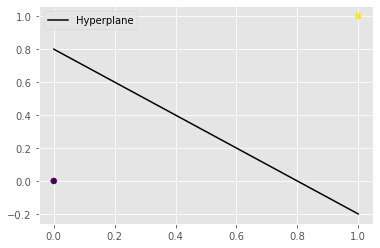

In [69]:
w = lsvm.coef_[0]
b = lsvm.intercept_[0]
slope = - w[0] / w[1]

xx = np.linspace(0, 1, 5)
yy = slope * xx - b / w[1]

h0 = plt.plot(xx, yy, 'k-', label='Hyperplane')
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.legend()
plt.show()

In [71]:
slope, -b/w[0]

(-1.0, 0.7999845354335795)

In [81]:
lsvm0 = svm.LinearSVC(C=100).fit(X, y)
print(lsvm0.coef_)
print(lsvm0.intercept_)

[[0.99251448 0.99251448]]
[-0.99008699]


In [82]:
w = lsvm0.coef_[0]
b = lsvm0.intercept_[0]
- w[0] / w[1], - b / w[1]

(-1.0, 0.9975542080068593)

#### 커널 트릭
앞서 데이터셋에 비선형 특성을 추가하여 강력한 선형 모델을 생성하였다. 하지만 많은 경우:
- 어떤 특성을 추가해야 할지 모르고 
- 특성을 많이 추가하면 연산 비용이 커진다. 

다행히 수학적 기교를 사용해서 새로운 특성을 많이 만들지 않고서도 고차원에서 분류기를 학습시킬 수 있다. 이를 **커널 기법(kernel trick)** 이라 하며 실제로 데이터를 확장하지 않고도 확장된 특성에 대한 데이터 포인트들의 거리(더 정확히는 유사도를 측정하는 스칼라 곱)를 계산해준다.
$$\kappa(\mathbf x, \mathbf x^`) = \kappa(\mathbf x^`, \mathbf x) \ge 0$$

서포트 벡터 머신에서 데이터를 고차원 공간에 매핑하는 데 많이 사용하는 방법은 다음과 같다:
1. $X^n$을 생성하는 다항식 커널
$$\kappa(x_1, x_2) = (\gamma (x_1^Tx_2) + \theta)^d$$
2. $X$에 대한 다항정규(가우시안) 분포를 생성하는 RBF(radial basis function) 커널
$$\kappa(x_1, x_2) = \exp \left( -\gamma ||x_1-x_2||^2 \right)$$
3. 시그모이드 커널 (Sigmoid Kernel)
$$\kappa(x_1, x_2) = \tanh(\gamma (x_1^Tx_2) + \theta)$$

![svc](https://sklearn.org/_images/sphx_glr_plot_iris_0012.png)

In [1]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
X = np.array([[0,0], [1,1], [0,1], [1,0]])
y = [0,0, 1,1]

In [3]:
SVM_XOR =SVC()
SVM_XOR.fit(X, y)

C:\Users\great\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [4]:
test_data = np.array([[.8,.8], [.2, .9]])
SVM_XOR.predict(test_data)

array([0, 1])

In [10]:
np.random.seed(0)
X = np.random.randn(300, 2)
y = np.logical_xor(X[:,0] > 0, X[:, 1] > 0)

SVM_XOR.fit(X, y)

C:\Users\great\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [15]:
X[:10]

array([[ 1.76405235,  0.40015721],
       [ 0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502],
       [ 0.44386323,  0.33367433],
       [ 1.49407907, -0.20515826],
       [ 0.3130677 , -0.85409574]])

In [16]:
y[:10]

array([False, False,  True,  True,  True, False, False, False,  True,
        True])

In [20]:
test_data = np.array([[.8, .8], [-.9, .9]])
SVM_XOR.predict(test_data)

array([False,  True])

In [23]:
np.c_[xx.ravel(), yy.ravel()].shape

(250000, 2)

C:\Users\great\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The following kwargs were not used by contour: 'linetypes'
  # Remove the CWD from sys.path while we load stuff.


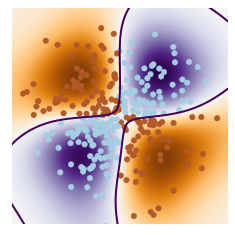

In [14]:
xx, yy = np.meshgrid(np.linspace(-3,3,500),
                     np.linspace(-3,3,500))

Z = SVM_XOR.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          aspect='equal', origin='lower', cmap=plt.cm.PuOr_r)
contours= plt.contour(xx, yy, Z, levels=[0], linewidths=2, linetypes='--')
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired)
plt.xticks(())
plt.yticks(())
plt.axis([-3,3,-3,3])
plt.show()

#### IRIS 데이터 분석

In [24]:
from sklearn.datasets import load_iris
iris = load_iris()

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    stratify=iris.target,
                                                    random_state=123)

In [27]:
from sklearn.svm import LinearSVC
svm = LinearSVC().fit(X_train, y_train)
svm.score(X_test, y_test)

C:\Users\great\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


1.0

In [28]:
from sklearn.svm import SVC
svm = SVC().fit(X_train, y_train)
svm.score(X_test, y_test)

C:\Users\great\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9473684210526315

SVC 튜닝하기

In [32]:
gammas = [0.1, 1, 5, 10]
Cs = [0.1, 0.5, 1.0, 10]
bestmodel = svm
bestparams = {}
bestscore = 0
for gamma in gammas:
    for C in Cs:
        svm = SVC(gamma=gamma, C=C).fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > bestscore:
            bestscore = score
            bestmodel = svm
            bestparams["gamma"]=gamma
            bestparams["C"]=C
            print(f"present best score is {score}")
            print(f"best params is \n{bestparams}")
        if bestscore == 1:
            break

present best score is 0.9210526315789473
best params is 
{'gamma': 0.1, 'C': 0.1}
present best score is 0.9473684210526315
best params is 
{'gamma': 0.1, 'C': 0.5}
present best score is 1.0
best params is 
{'gamma': 0.1, 'C': 10}


[Quiz] breast cancer 데이터를 SVC를 이용하여 모델 튜닝을 하여 성능을 높이도록 하자.

In [33]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target,
                                                    random_state=123)
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
gammas = [0.01, 0.05, 0.1]
# gammas = [0.1, 1, 5, 10]
Cs = [0.1, 0.5, 1.0, 10]
bestmodel = svm
bestparams = {}
bestscore = 0
for gamma in gammas:
    for C in Cs:
        svm = SVC(gamma=gamma, C=C).fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > bestscore:
            bestscore = score
            bestmodel = svm
            bestparams["gamma"]=gamma
            bestparams["C"]=C
            print(f"present best score is {score}")
            print(f"best params is \n{bestparams}")
        if bestscore == 1:
            break

present best score is 0.951048951048951
best params is 
{'gamma': 0.01, 'C': 0.1}
present best score is 0.965034965034965
best params is 
{'gamma': 0.01, 'C': 0.5}
present best score is 0.972027972027972
best params is 
{'gamma': 0.01, 'C': 1.0}
present best score is 0.9790209790209791
best params is 
{'gamma': 0.05, 'C': 0.5}
